## Final Project Submission

Please fill out:

* Student name: Dhruv Ragunathan
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Mark Barbour
* Blog post URL:

# Introduction and Business Case

As the world struggles to vaccinate the global population against COVID-19, an understanding of how people’s backgrounds, opinions, and health behaviors are related to their personal vaccination patterns can provide guidance for future public health efforts. The stakeholders for this study are public health officials responsible for determining vaccination strategy.

The goal of this project is too predict whether people got H1N1 and seasonal flu vaccines using data collected in the National 2009 H1N1 Flu Survey. This is a binary classification problem where we will be investigating if a respondent received the H1N1 flu vaccine. 

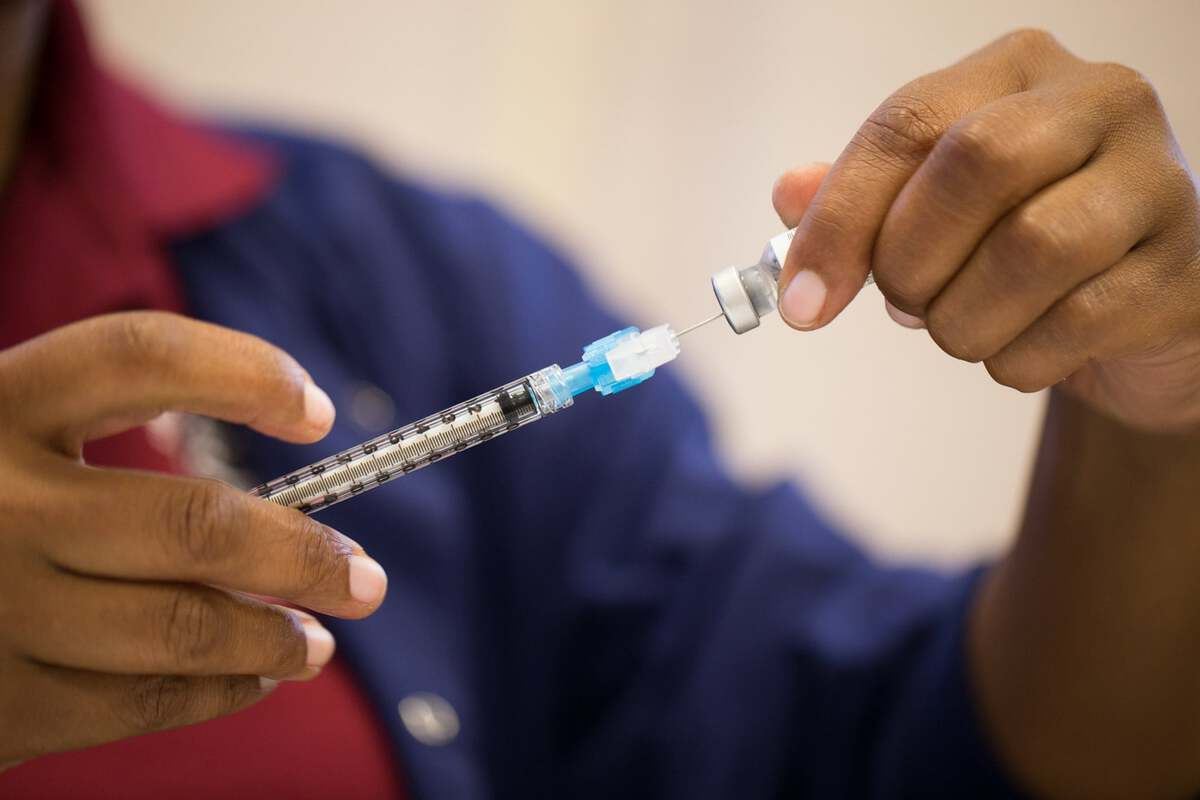

### In this study, we will predict whether a participant will get an H1N1 vaccine.

# Data Understanding

* There are three sets of CSVs provided as part of this study.
* Two of the CSVs are for modeling training, and one is for model testing.
* A train - test split has already been done for us, but we will perform a train - test split on the training data anyway.
* The CSV 'training set features' provides columns we can use to target whether a participant got the Flu Vaccine or not
* The CSV training set labels contains the target column.

## Training Data Set
</br>
* The training data set with the features contain 26,707 entries with 35 different columns. The columns are listed out below.

## Target Training Data Set

* The target feature set contains 26707 entries with 3 columns:
 * Respondent ID
 * H1N1 Vaccine Status
 * Seasonal Flu Vaccine Status

For this study, we are predicting whether the H1N1 Vaccine was used. The 0s in the H1N1 column indicate that the vaccine was not taken. 1 indicates that it was.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X = pd.read_csv('training_set_features.csv', index_col='respondent_id') # Training feature set
y = pd.read_csv('training_set_labels.csv',index_col='respondent_id') #Target column

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [4]:
y.head(5)

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [5]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   h1n1_vaccine      26707 non-null  int64
 1   seasonal_vaccine  26707 non-null  int64
dtypes: int64(2)
memory usage: 625.9 KB


In [6]:
y.drop(columns = ['seasonal_vaccine'],axis=0,inplace=True)

In [7]:
y

,h1n1_vaccine
respondent_id,
0,0
1,0
2,0
3,0
4,0
...,...
26702,0
26703,0
26704,0


# Feature and Target Selection

* Target: 

# Data Preparation

In [8]:
X.isna().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [9]:
X.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [10]:
#drop columns not related to H1N1: seas_vacc_effective, seas_risk_seas_sick
# Drop Columns: health insurance, employment_industry, employment occupation, income_povery
# drop rows: h1n1_*, behavioral_*, opinion_h1n1_vacc_effective, opinion_h1n1_risk, opinion_h1n1_sick_from_vacc
#household_adults, household_children

# fill with median: doctor_recc_*, health_worker
# fill with mode: chronic_med_cond, child_under_6_months, health_worker, education, marital_status, rent_or_own,employment_status




In [11]:
# List of columns dropped related to seasonal vaccine

Seas_Columns_Dropped = ['doctor_recc_seasonal',"opinion_seas_vacc_effective","opinion_seas_risk","opinion_seas_sick_from_vacc"]


In [12]:
# List of Columns Dropped because they have large amounts of data missing

Column_Dropped_High_Data_Loss = ["health_insurance", "employment_industry", 'employment_occupation', 'income_poverty']

In [13]:
# List of Columns where we are dropping columns with NA

Drop_Row_Columns = ["h1n1_concern", "h1n1_knowledge",'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home','behavioral_touch_face','opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'household_children', 'household_adults']


In [14]:
# List of columns where we fill missing values with the median and Mode

Fill_Median = ['doctor_recc_h1n1', 'health_worker']
Fill_Mode = ['chronic_med_condition', 'child_under_6_months', 'health_worker', 'education', 'marital_status', 'rent_or_own', 'employment_status']


In [15]:
# First drop seasonal columns

X = X.drop(Seas_Columns_Dropped,axis = 1)

X.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'health_insurance',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'age_group', 'education', 'race', 'sex',
       'income_poverty', 'marital_status', 'rent_or_own', 'employment_status',
       'hhs_geo_region', 'census_msa', 'household_adults',
       'household_children', 'employment_industry', 'employment_occupation'],
      dtype='object')

In [16]:
# Drop columns that have mostly NA rows

X = X.drop(Column_Dropped_High_Data_Loss,axis = 1)

X.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'marital_status', 'rent_or_own',
       'employment_status', 'hhs_geo_region', 'census_msa', 'household_adults',
       'household_children'],
      dtype='object')

In [17]:
# Fill columns with median

for col in Fill_Median:
    X[col].fillna(X[col].median(),inplace = True)

X[Fill_Median].isna().sum()

doctor_recc_h1n1    0
health_worker       0
dtype: int64

In [18]:
X['household_children'].mode()

0    0.0
dtype: float64

In [27]:
# Fill columns with Mode

for col in Fill_Mode:
    X[col].fillna(X[col].mode()[0],inplace=True)
    
X[Fill_Mode].isna().sum()

chronic_med_condition    0
child_under_6_months     0
health_worker            0
education                0
marital_status           0
rent_or_own              0
employment_status        0
dtype: int64

In [30]:
# Finally drop rows in columns that have minimal data missing

X.dropna(axis=0,inplace=True)

X[Drop_Row_Columns].isna().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
household_children             0
household_adults               0
dtype: int64

In [31]:
X.isna().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa                     0
household_adults               0
household_children             0
dtype: int64

# Modeling

* First import libraries
* Train - Test Split the data
* Start with the baseline logistical model

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix, recall_score, accuracy_score, precision_score, f1_score, roc_auc_score
from sklearn.multioutput import MultiOutputClassifier

In [23]:
## Train Test Split - 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)


## Baseline model

A logistical Regression model will be used as the baseline model.

# Conclusions

# Next Steps